In [17]:
import yfinance as yf
from datetime import date
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame(
        yf.download(
            tickers = "^SP500-50 ^SP500-25 ^SP500-30 ^GSPE ^SP500-40 ^SP500-35 ^SP500-20 ^SP500-45 ^SP500-15 ^SP500-60 ^SP500-55",
            start="2019-01-30", end= date.today(),
            interval = "1d"
        )
)

[*********************100%***********************]  11 of 11 completed


In [18]:
data.rename({"^SP500-50" : "Communication Services",
    "^SP500-25": "Consumer Discretionary",
    "^SP500-30": "Consumer Staples", 
    "^GSPE": "Energy",
    "^SP500-40": "Financials",
    "^SP500-35": "Health Care",
    "^SP500-20": "Industrials",
    "^SP500-45": "Information Technology",
    "^SP500-15": "Materials",
    "^SP500-60": "Real Estate",
    "^SP500-55": "Utilities"

}, axis=1, inplace=True)
close = data["Close"]
returns = pd.DataFrame(np.log(close/close.shift(1)))
returns

,Energy,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Communication Services,Utilities,Real Estate
Date,,,,,,,,,,,
2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,0.007077,-0.015509,0.004532,0.010843,0.018028,0.011248,-0.002695,-0.001160,0.036671,0.020521,0.009435
2019-02-01,0.018164,0.004511,0.001986,-0.017909,-0.002668,0.002231,0.005104,0.006034,-0.003410,-0.002994,-0.006690
2019-02-04,0.001709,-0.002268,0.012893,0.006350,0.006057,-0.003434,0.003742,0.015879,0.009480,0.002093,0.006502
2019-02-05,0.001644,0.007975,0.008709,0.009525,-0.000182,-0.000803,-0.001431,0.008809,0.009069,0.001189,0.005993
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14,-0.037757,-0.034728,-0.022559,-0.039533,-0.018504,-0.008368,-0.017927,-0.029118,-0.019579,-0.015509,-0.026277
2022-10-17,0.012153,0.025107,0.022204,0.041428,0.011076,0.017219,0.025436,0.030438,0.032862,0.021454,0.038183
2022-10-18,0.007507,0.018949,0.023323,0.014080,0.013039,0.005645,0.016307,0.008278,0.005324,0.017746,0.012620


Whole period

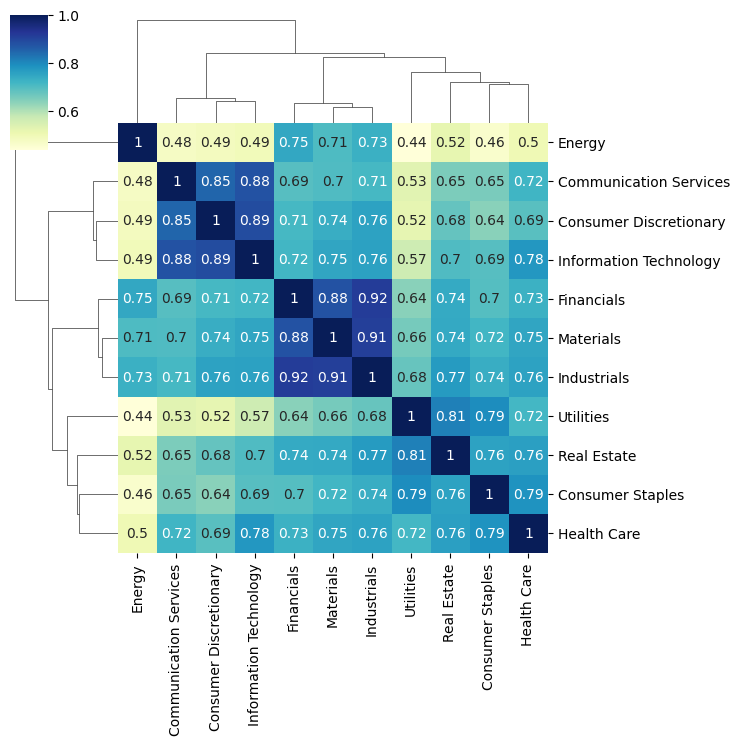

In [19]:
returns_corr = returns.corr()
sns.clustermap(returns_corr, cmap="YlGnBu", annot=True, figsize=(7.5, 7.5))

1y before the pandemic 30jan

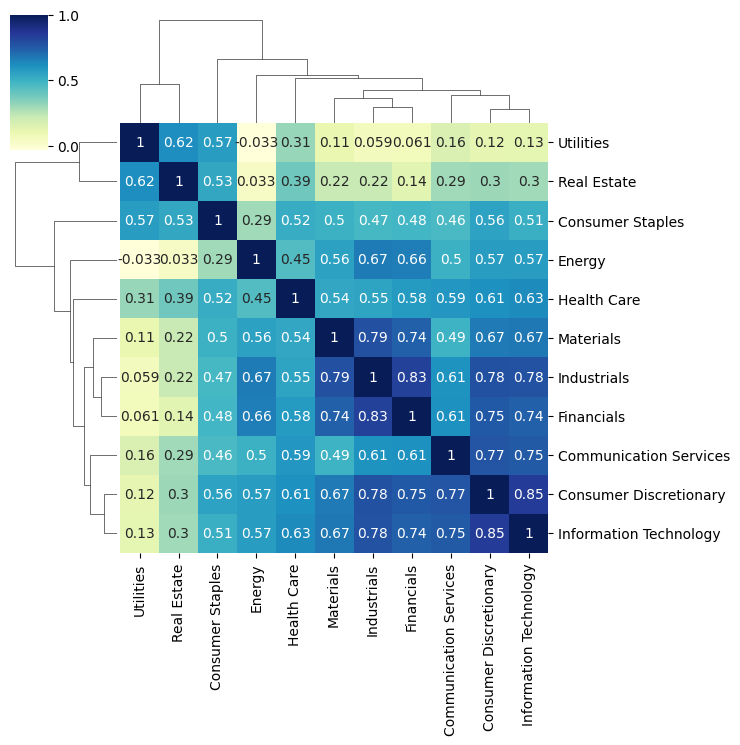

In [20]:
returns_1y_before = returns.loc[:'2020-01-30']
correlation_1y_before = returns_1y_before.corr()
sns.clustermap(correlation_1y_before, cmap="YlGnBu", annot=True, figsize=(7.5, 7.5))

From the start of the COVID-19 pandemic to the start of the war in Ukraine

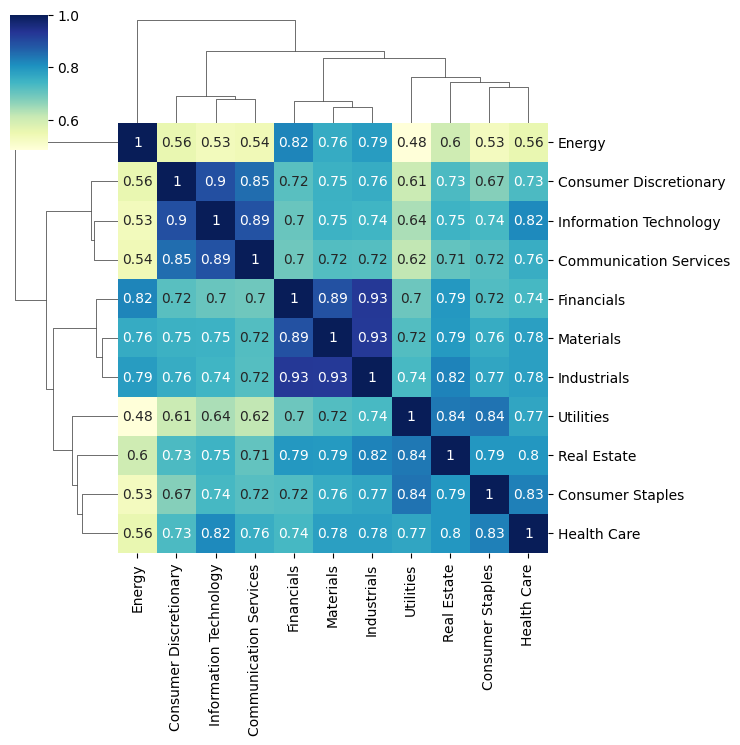

In [21]:
returns_covid = returns.loc['2020-01-31':'2022-02-23']
correlation_covid = returns_covid.corr()
sns.clustermap(correlation_covid, cmap="YlGnBu", annot=True, figsize=(7.5, 7.5))

From the start of the Ukraine war to now

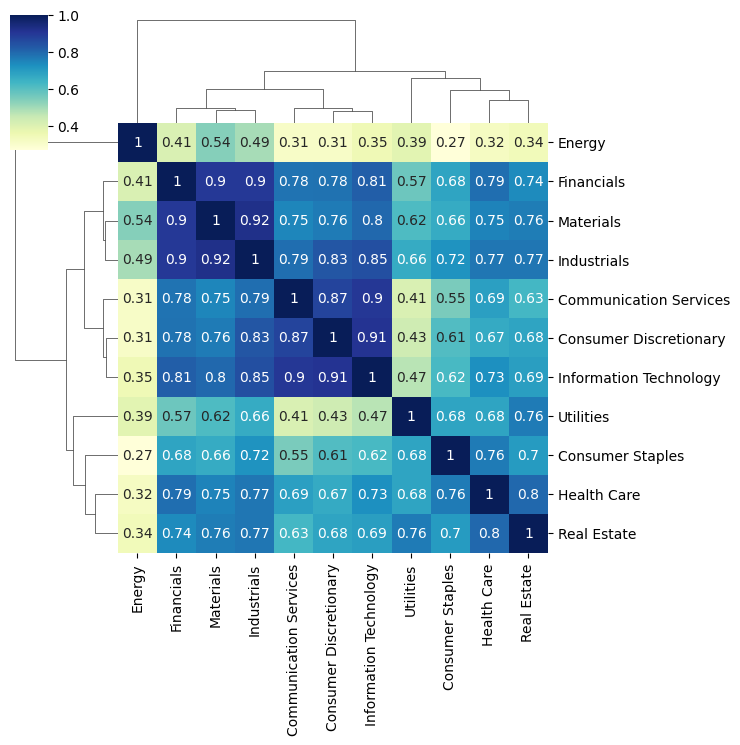

In [22]:
returns_war = returns.loc['2022-02-24':]
correlation_war = returns_war.corr()

cmap_war = sns.clustermap(correlation_war, cmap="YlGnBu", annot=True, figsize=(7.5, 7.5))